# Descripcion del dataset

Para describir un dataset como **"Cat in the Dat"**, seguiría estos pasos:

---

### 1. **Descripción General del Dataset**
El dataset **"Cat in the Dat"** es un conjunto de datos categóricos diseñado para un problema de clasificación binaria. El objetivo es predecir una **variable objetivo binaria (`target`)** basada en múltiples características categóricas. Este dataset es útil para explorar técnicas de preprocesamiento y codificación de datos categóricos.

---

### 2. **Objetivo del Dataset**
El objetivo principal es construir un modelo que prediga el valor de la variable `target` (0 o 1) utilizando las características categóricas proporcionadas. Este problema es típico en tareas de clasificación supervisada.

---

### 3. **Atributos del Dataset**
El dataset contiene las siguientes columnas:

- **`id`**: Identificador único para cada fila. No tiene relevancia para el análisis.
- **`target`**: Variable objetivo binaria (0 o 1). Es el atributo clase que queremos predecir.
- **Características categóricas**:
  - **Ordinales**: Variables categóricas con un orden lógico (por ejemplo, niveles educativos).
  - **Nominales**: Variables categóricas sin un orden lógico (por ejemplo, colores o nombres).
  - **Cíclicas**: Variables categóricas que tienen un patrón cíclico (por ejemplo, meses o días de la semana).

---

### 4. **Significado de los Atributos**
El significado exacto de las columnas puede variar dependiendo de la descripción oficial del dataset (si está disponible). Sin embargo, en general, las columnas categóricas representan diferentes tipos de datos categóricos que deben ser preprocesados antes de usarse en un modelo.

Ejemplo de atributos categóricos:
- **`bin_0`, `bin_1`, ...`bin_n`**: Variables binarias (0 o 1).
- **`nom_0`, `nom_1`, ...`nom_n`**: Variables nominales con múltiples categorías.
- **`ord_0`, `ord_1`, ...`ord_n`**: Variables ordinales con un orden lógico.
- **`day`, `month`**: Variables cíclicas que representan días y meses.

---

### 5. **Atributo Clase**
El atributo clase es **`target`**, que toma valores binarios:
- **0**: Clase negativa.
- **1**: Clase positiva.

Este es el atributo que queremos predecir utilizando las demás columnas como características.

---

### 6. **Exploración Inicial**
Para entender mejor el dataset, realizaría un análisis exploratorio inicial:

```python
import pandas as pd

# Cargar el dataset
df = pd.read_csv("train.csv")

# Información general del dataset
print(df.info())

# Resumen estadístico
print(df.describe(include="all"))

# Verificar valores únicos por columna
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")

# Visualizar las primeras filas
print(df.head())
```

---

### 7. **Conclusión**
El dataset **"Cat in the Dat"** es un excelente ejemplo para trabajar con datos categóricos. Su objetivo es predecir una variable binaria (`target`) utilizando una variedad de características categóricas que requieren diferentes técnicas de preprocesamiento, como codificación y manejo de valores faltantes.

# Importacion del dataset test

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("train.csv")


## Limpieza inicial

In [3]:
# Eliminar columnas con más del 70% de valores faltantes
umbral = 0.7
columnas_a_eliminar = df.columns[df.isnull().mean() > umbral]
df.drop(columns=columnas_a_eliminar, inplace=True)
print(columnas_a_eliminar)

Index([], dtype='object')


In [4]:
#Llenado de datos faltantes de tipo float64 con la mediana
for col in df.select_dtypes(include=['float64']).columns:
    df[col].fillna(df[col].median(), inplace=True)

#Llenado de datos faltantes de tipo str con la moda
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


#Datos faltantes
datos_faltantes =df.isnull().sum()
print(datos_faltantes)

C:\Users\Windows\AppData\Local\Temp\ipykernel_4316\3116093107.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\Windows\AppData\Local\Temp\ipykernel_4316\3116093107.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

id        0
bin_0     0
bin_1     0
bin_2     0
bin_3     0
bin_4     0
nom_0     0
nom_1     0
nom_2     0
nom_3     0
nom_4     0
nom_5     0
nom_6     0
nom_7     0
nom_8     0
nom_9     0
ord_0     0
ord_1     0
ord_2     0
ord_3     0
ord_4     0
ord_5     0
day       0
month     0
target    0
dtype: int64


## Codificacion para las variables binarias

- Las unicaas variables que necesitan este tipo de tratamiento son las variables bin_3 y bin_4

In [5]:
from sklearn.calibration import LabelEncoder

columnas_binarias = ['bin_3','bin_4']

#Codificacion para bin_3
le = LabelEncoder()
label_encoder_bin3 = df['bin_3'].values
bin_3_np = le.fit_transform(label_encoder_bin3)

#Codificacion para bin_4
le = LabelEncoder()
label_encoder_bin4 = df['bin_4'].values
bin_4_np = le.fit_transform(label_encoder_bin4)

#Creacion de dataframe para las variables binarias codificadas
d = {
    'bin_3' : bin_3_np,
    'bin_4' : bin_4_np
}

#Se agregan los dos columnas a un dataframe
X_label_endoded_df = pd.DataFrame(data = d)

print(X_label_endoded_df.head()) 

   bin_3  bin_4
0      0      0
1      0      1
2      0      0
3      0      0
4      1      0


## Codificicacion Nominal (One-Hot Encoding) - Test

- En el siguiente paso vamos a hacer codificacion nominal usando One-Hot Encoding para convertir los datos categoricos de las columnas nom_0, nom_1, ... , nom_9. 

In [6]:
from sklearn.preprocessing import OneHotEncoder

#Por lo visto nom_5, ..., nom_9 son valores que tienen demasiada variabilidad
# y por las graficas estos estan distribuidos casi uniformemente por todo el datset lo que podria indicar
# que no son relevantes para el estudio de nuestro data set

# Seleccionar columnas nominales
columnas_nominales = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4']
# Aplicar One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)
X_nominal_encoded = encoder.fit_transform(df[columnas_nominales])

# Crear un DataFrame con los nombres de las columnas codificadas
feature_names = encoder.get_feature_names_out(columnas_nominales)
X_nominal_encoded_df = pd.DataFrame(X_nominal_encoded, columns=feature_names)

print("\nCodificación One-Hot para variables nominales:")
print(X_nominal_encoded_df.head())


Codificación One-Hot para variables nominales:
   nom_0_Blue  nom_0_Green  nom_0_Red  nom_1_Circle  nom_1_Polygon  \
0         0.0          0.0        1.0           0.0            0.0   
1         0.0          0.0        1.0           0.0            0.0   
2         0.0          0.0        1.0           0.0            0.0   
3         0.0          0.0        1.0           1.0            0.0   
4         0.0          0.0        1.0           0.0            0.0   

   nom_1_Square  nom_1_Star  nom_1_Trapezoid  nom_1_Triangle  nom_2_Axolotl  \
0           0.0         0.0              1.0             0.0            0.0   
1           0.0         1.0              0.0             0.0            1.0   
2           0.0         0.0              0.0             1.0            0.0   
3           0.0         0.0              0.0             0.0            0.0   
4           0.0         0.0              0.0             1.0            0.0   

   ...  nom_3_Canada  nom_3_China  nom_3_Costa Rica  nom

## Codificacion Ordinal (Ordinal Encoding)

In [7]:
from sklearn.preprocessing import OrdinalEncoder

# Seleccionar columnas ordinales
columnas_ordinales = ['ord_0', 'ord_1', 'ord_2', 'ord_3', 'ord_4', 'ord_5']  
# Definir el orden lógico de las categorías (si aplica)

ordinal_encoder = OrdinalEncoder()  # Sin especificar categorías
X_ordinal_encoded = ordinal_encoder.fit_transform(df[columnas_ordinales])

# Crear un DataFrame con las columnas codificadas
X_ordinal_encoded_df = pd.DataFrame(X_ordinal_encoded, columns=columnas_ordinales)

print("\nCodificación Ordinal para variables ordinales:")
print(X_ordinal_encoded_df.head())


Codificación Ordinal para variables ordinales:
   ord_0  ord_1  ord_2  ord_3  ord_4  ord_5
0    2.0    0.0    3.0    2.0   20.0   56.0
1    2.0    2.0    5.0    4.0   23.0  150.0
2    2.0    4.0    2.0   13.0   15.0  105.0
3    0.0    4.0    4.0    0.0    2.0   21.0
4    2.0    2.0    1.0    7.0    2.0   50.0


## Codificacion de variables ciclicas

In [8]:
import numpy as np

# Transformar variables cíclicas
df['day_sin'] = np.sin(2 * np.pi * df['day'] / 7)  # Día de la semana (7 días)
df['day_cos'] = np.cos(2 * np.pi * df['day'] / 7)

df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)  # Mes del año (12 meses)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

print("\nTransformación cíclica para variables 'day' y 'month':")
print(df[['day_sin', 'day_cos', 'month_sin', 'month_cos']].head())


Transformación cíclica para variables 'day' y 'month':
        day_sin   day_cos     month_sin     month_cos
0 -7.818315e-01  0.623490  1.000000e+00  6.123234e-17
1 -2.449294e-16  1.000000 -5.000000e-01 -8.660254e-01
2 -9.749279e-01 -0.222521 -1.000000e+00 -1.836970e-16
3  4.338837e-01 -0.900969  1.000000e+00  6.123234e-17
4 -9.749279e-01 -0.222521 -2.449294e-16  1.000000e+00


## Combinar las transformaciones

In [14]:
# Combinar todas las transformaciones
df_final = pd.concat([df[['id', 'bin_0', 'bin_1', 'bin_2']], X_label_endoded_df, X_nominal_encoded_df, X_ordinal_encoded_df, df[['day','month','target']] ], axis=1)
#df_final = pd.concat(X_label_endoded_df, X_nominal_encoded_df, axis=1)
#df_final = pd.concat( X_ordinal_encoded_df, df[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'target']], axis=1)


print("\nDataset final después de las transformaciones:")
print(df_final.head())
type(df_final)


Dataset final después de las transformaciones:
   id  bin_0  bin_1  bin_2  bin_3  bin_4  nom_0_Blue  nom_0_Green  nom_0_Red  \
0   0    0.0    0.0    0.0      0      0         0.0          0.0        1.0   
1   1    1.0    1.0    0.0      0      1         0.0          0.0        1.0   
2   2    0.0    1.0    0.0      0      0         0.0          0.0        1.0   
3   3    0.0    0.0    0.0      0      0         0.0          0.0        1.0   
4   4    0.0    0.0    0.0      1      0         0.0          0.0        1.0   

   nom_1_Circle  ...  nom_4_Theremin  ord_0  ord_1  ord_2  ord_3  ord_4  \
0           0.0  ...             0.0    2.0    0.0    3.0    2.0   20.0   
1           0.0  ...             1.0    2.0    2.0    5.0    4.0   23.0   
2           0.0  ...             0.0    2.0    4.0    2.0   13.0   15.0   
3           1.0  ...             1.0    0.0    4.0    4.0    0.0    2.0   
4           0.0  ...             1.0    2.0    2.0    1.0    7.0    2.0   

   ord_5  day  month

pandas.core.frame.DataFrame

In [15]:
csv_filename = 'train_encoded'
df_final.to_csv(csv_filename, index=False)

## Prueba para arboles de decision

Precisión Árbol de decisión: 0.81


c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Windows\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

Accuracy promedio: 0.8128
Precision promedio: 0.4064
Recall promedio: 0.5000
F1-score promedio: 0.4484


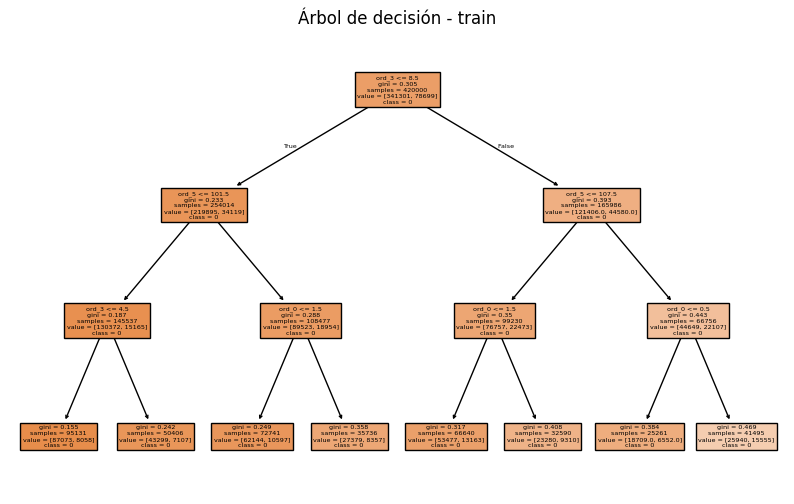

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar dataset Iris
#iris = load_iris()
#X = iris.data
#y = iris.target


X = df_final.drop(columns=['target'], axis=1)
y = df_final['target'].to_numpy()

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ===== Modelo: Árbol de decisión =====
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)
arbol.fit(X_train, y_train)
y_pred_arbol = arbol.predict(X_test)
acc_arbol = accuracy_score(y_test, y_pred_arbol)
print(f"Precisión Árbol de decisión: {acc_arbol:.2f}")

#Agregar aqui el codigo hecho en clase

scoring = {
    'accuracy':'accuracy',
    'precision_macro':'precision_macro',
    'recall_macro':'recall_macro',
    'f1_macro':'f1_macro'
}

results = cross_validate(arbol, X,y, cv=10,scoring=scoring)
print(f"Accuracy promedio: {results['test_accuracy'].mean():.4f}")
print(f"Precision promedio: {results['test_precision_macro'].mean():.4f}")
print(f"Recall promedio: {results['test_recall_macro'].mean():.4f}")
print(f"F1-score promedio: {results['test_f1_macro'].mean():.4f}")


# Visualizar el árbol
plt.figure(figsize=(10, 6))
plot_tree(arbol, filled=True, feature_names=X.columns, class_names=arbol.classes_.astype(str))
plt.title("Árbol de decisión - train")
plt.show()



In [25]:
# ===== Modelo: K-Nearest Neighbors =====
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Precisión KNN: {acc_knn:.2f}")

Precisión KNN: 0.78
